In [17]:
import sys
import os
print(sys.executable)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import importlib
seaborn_found = importlib.util.find_spec('seaborn')
if seaborn_found is None:
    sys.write.stderr("[error] Seaborn package not found. exit")
    exit(-1)

import seaborn as sns
import pandas as pd

import matplotlib as mpl

#mpl.use("pgf")

import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": False,     # use inline math for ticks
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
    "pgf.preamble": [
         "\\usepackage{units}",          # load additional packages
         "\\usepackage{metalogo}",
         "\\usepackage{unicode-math}",   # unicode math setup
         r"\setmathfont{xits-math.otf}",
         ]
})

# plt.rc('text', usetex=False)

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": [],                    # use latex default serif font
    "font.size": "18",
})

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": [
         r"\usepackage[utf8x]{inputenc}",
         r"\usepackage[T1]{fontenc}",
         r"\usepackage{cmbright}",
         ]
})


sns.set(style="ticks", color_codes=True, font_scale=1.3)
sns.set_context("paper", rc={"axes.labelsize":14, "axes.titlesize":14, "legend.fontsize":14, "xtick.labelsize":14, "ytick.labelsize":14, "font.size":14})

sns.set_style("darkgrid", {'xtick.bottom': True, 'xtick.top': False, 'ytick.left': True, 'ytick.right': False, 'axes.grid': True, "axes.facecolor": ".9", 'grid.linestyle': '-', 'lines.linewidth':2.5})
# sns.set_palette("dark")

mpl.pyplot.close("all")


tasks = ["RESAMPLE_TIME_S", "COMBINE_TIME_S"]
DIR="/Users/lpottier/research/usc-isi/projects/active/workflow-io-bb/data/traces/swarp/"

/usr/local/opt/python/bin/python3.7


In [18]:
csv_file_cori = DIR+"shared-cori/bb-runs2020-Xc.csv"
csv_file_summit = DIR+"/private-summit/runs-number-cores-1w.csv"

CORE="X"
#PLOT_DIR="/Users/lpottier/research/usc-isi/projects/paper-workflow-bb/figures/plots/real-swarp"
PLOT_DIR=os.getcwd()
OUTPUT = PLOT_DIR+"/"+"swarp-1w-"+CORE+"c/"


In [19]:

try:
    # Create target Directory
    os.mkdir(OUTPUT)
    print("Directory " , OUTPUT ,  " Created ") 
except FileExistsError:
    print("Directory " , OUTPUT ,  " already exists")


#csv_file = "swarp_test_switches.csv"
df_swarp_cori = pd.read_csv(csv_file_cori, sep=' ')
df_swarp_summit = pd.read_csv(csv_file_summit, sep=' ')

df_swarp = pd.concat([df_swarp_cori, df_swarp_summit])

df_swarp_priv = df_swarp[df_swarp.BB_TYPE=="PRIVATE"]
df_swarp_strip = df_swarp[df_swarp.BB_TYPE=="STRIPED"]
df_swarp_onnode = df_swarp[df_swarp.BB_TYPE=="ONNODE"]

print(df_swarp.BB_NB_FILES.unique())
df_swarp = df_swarp.loc[df_swarp['BB_NB_FILES'].isin([0,8,16,24,32])]
print(df_swarp.BB_NB_FILES.unique())

print(df_swarp.info())
print(df_swarp.NB_CORES.unique())
print(df_swarp.FITS.unique())
print(df_swarp.BB_TYPE.unique())

## Use the full data

is_FITS =  df_swarp['FITS']=="Y"
is_PRIVATE =  df_swarp['BB_TYPE']=="PRIVATE"
is_STRIPED =  df_swarp['BB_TYPE']=="STRIPED"
is_ONNODE =  df_swarp['BB_TYPE']=="ONNODE"

fig_size_square = (4, 3)
fig_size_rect = (6.5, 4)


Directory  /Users/lpottier/research/usc-isi/projects/active/workflow-io-bb/data/traces/notebooks/swarp-1w-Xc/  already exists
[32]
[32]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 149
Data columns (total 25 columns):
ID                     450 non-null int64
START                  0 non-null float64
END                    0 non-null float64
FITS                   450 non-null object
NB_PIPELINE            450 non-null int64
NB_CORES               450 non-null int64
AVG                    450 non-null int64
PIPELINE               450 non-null int64
BB_TYPE                450 non-null object
BB_ALLOC_SIZE_MB       450 non-null float64
TOTAL_NB_FILES         450 non-null int64
BB_NB_FILES            450 non-null int64
TOTAL_SIZE_FILES_MB    450 non-null float64
BB_SIZE_FILES_MB       450 non-null float64
BANDWIDTH_MBS          450 non-null float64
MAKESPAN_S             450 non-null float64
WALLTIME_S             450 non-null float64
STAGEIN_TIME_S         450 non-

In [20]:
# small_dt = df_swarp[["FITS", "BB_TYPE", "NB_CORES", "BB_NB_FILES","RESAMPLE_TIME_S", "COMBINE_TIME_S"]]
# #small_dt = small_dt.sort_values(by=['NB_PIPELINE'])
# print(small_dt.sort_values(by=['NB_CORES', 'BB_NB_FILES']))

In [21]:
# small_dt = df_swarp[["NB_PIPELINE", "FITS", "BB_NB_FILES" ,"MAKESPAN_S"]]
# #small_dt = small_dt.sort_values(by=['NB_PIPELINE'])
# print(small_dt.sort_values(by=['NB_PIPELINE', 'FITS', "BB_NB_FILES"]))

In [22]:
legend_bb=['Private (Cori)', 'Striped (Cori)', 'On-node (Summit)']

Plot line fits task: RESAMPLE_TIME_S


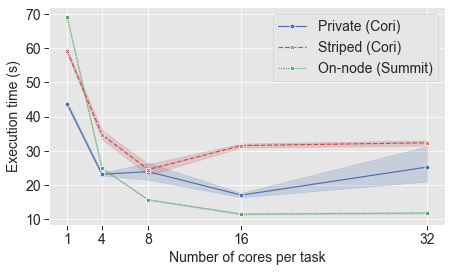

Plot line fits task: COMBINE_TIME_S


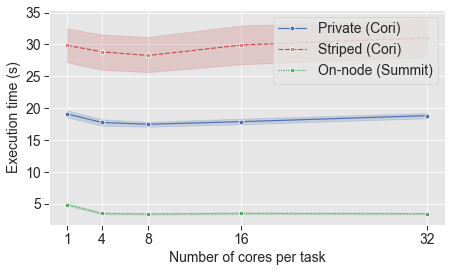

In [25]:

def plot_lineplot_per_task(df, col, output, legend, loc='upper left'):
    xlabel='Number of cores per task'
    ylabel='Execution time (s)'
    
    name = col.split("_")[0].lower()

    df2 = df.copy()
    
    df2["BB_TYPE"]= df2["BB_TYPE"].str.replace("PRIVATE", 'Private (Cori)', case = False)
    df2["BB_TYPE"]= df2["BB_TYPE"].str.replace("STRIPED", 'Striped (Cori)', case = False)
    df2["BB_TYPE"]= df2["BB_TYPE"].str.replace("ONNODE", 'On-node (Summit)', case = False)
    
    f = plt.figure(figsize=fig_size_rect)
    f.patch.set_alpha(0)
    
    g = sns.lineplot(x="NB_CORES", y=col, hue="BB_TYPE", style="BB_TYPE", data=df2, markers=True, palette={'Private (Cori)': 'b', 'Striped (Cori)': 'r', 'On-node (Summit)': 'g'})
    g.legend(title='', labels=legend)
    g.set(xlabel=xlabel, ylabel=ylabel,xticks=df2.NB_CORES.unique())

    plt.tight_layout()
    plt.savefig(OUTPUT+'swarp-line-'+name+output+'.pdf', facecolor=f.get_facecolor(), edgecolor='none')
    plt.savefig(OUTPUT+'swarp-line-'+name+output+'.pgf', facecolor=f.get_facecolor(), edgecolor='none')
    plt.show()

loc=['upper left', 'lower right', 'upper left', 'lower right']

for i,task in enumerate(tasks):
    print("Plot line fits task:", task)
    plot_lineplot_per_task(df_swarp, task, output="-fits-1w-Xc-32f", legend=legend_bb, loc=loc[i])
    

In [8]:
#grouped = small_dt.groupby('BB_NB_FILES', sort=True)
#print(grouped.groups)

In [9]:
# plt.figure()
# df_swarp_priv = df_swarp_priv.sort_values(by=['BB_NB_FILES'])
# tmp_df = df_swarp_priv[df_swarp_priv.FITS=="N"]
# plt.errorbar(tmp_df.BB_NB_FILES, tmp_df.RESAMPLE_MEAN_TIME_S, xerr=0, yerr=tmp_df.RESAMPLE_SD_TIME)
# #plt.title("")

# #g = sns.lineplot(x="BB_NB_FILES", y="RESAMPLE_MEAN_TIME_S", ci="RESAMPLE_SD_TIME", hue="FITS", style="FITS", markers=True, dashes=True, data=swarp_dt_priv)

In [10]:
#g = sns.lineplot(x="BB_NB_FILES", y="COMBINE_MEAN_TIME_S", hue="FITS", style="FITS", markers=True, dashes=True, data=swarp_dt_priv)

# swarp_dt_priv = swarp_dt_priv.sort_values(by=['BB_NB_FILES'])
# swarp_dt_priv_nofits = swarp_dt_priv[swarp_dt_priv.FITS=="N"]
# swarp_dt_priv_fits = swarp_dt_priv[swarp_dt_priv.FITS=="Y"]


# fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=False)
# #plt.axis('scaled')

# ax = axs[0,0]
# ax.errorbar(swarp_dt_priv_fits.BB_NB_FILES, swarp_dt_priv_fits.MEAN_MAKESPAN_S, yerr=swarp_dt_priv_fits.SD_MAKESPAN, color="b")
# ax.errorbar(swarp_dt_priv_nofits.BB_NB_FILES, swarp_dt_priv_nofits.MEAN_MAKESPAN_S, yerr=swarp_dt_priv_nofits.SD_MAKESPAN, color="r")

# ax.set_title('MEAN_MAKESPAN_S')

# # With 4 subplots, reduce the number of axis ticks to avoid crowding.
# ax.locator_params(nbins=4)

# ax.minorticks_on()
# ax.grid()
# ax.set_ylabel('Time (s)')


# ax = axs[0,1]
# ax.errorbar(swarp_dt_priv_fits.BB_NB_FILES, swarp_dt_priv_fits.STAGEIN_MEAN_TIME_S, yerr=swarp_dt_priv_fits.STAGEIN_SD_TIME, color="b")
# ax.errorbar(swarp_dt_priv_nofits.BB_NB_FILES, swarp_dt_priv_nofits.STAGEIN_MEAN_TIME_S, yerr=swarp_dt_priv_nofits.STAGEIN_SD_TIME, color="r")
# ax.set_title('STAGEIN_MEAN_TIME_S')

# ax.minorticks_on()
# ax.grid()

# ax = axs[1,0]
# ax.errorbar(swarp_dt_priv_fits.BB_NB_FILES, swarp_dt_priv_fits.RESAMPLE_MEAN_TIME_S, yerr=swarp_dt_priv_fits.RESAMPLE_SD_TIME, color="b")
# ax.errorbar(swarp_dt_priv_nofits.BB_NB_FILES, swarp_dt_priv_nofits.RESAMPLE_MEAN_TIME_S, yerr=swarp_dt_priv_nofits.RESAMPLE_SD_TIME, color="r")

# ax.set_title('RESAMPLE_MEAN_TIME_S')

# ax.minorticks_on()
# ax.grid()
# ax.set_xlabel('Number of files in BB')
# ax.set_ylabel('Time (s)')

# ax = axs[1,1]
# ax.errorbar(swarp_dt_priv_fits.BB_NB_FILES, swarp_dt_priv_fits.COMBINE_MEAN_TIME_S, yerr=swarp_dt_priv_fits.COMBINE_SD_TIME, color="b")
# ax.errorbar(swarp_dt_priv_nofits.BB_NB_FILES, swarp_dt_priv_nofits.COMBINE_MEAN_TIME_S, yerr=swarp_dt_priv_nofits.COMBINE_SD_TIME, color="r")
# ax.set_title('COMBINE_MEAN_TIME_S')

# ax.minorticks_on()
# ax.grid()
# ax.set_xlabel('Number of files in BB')

# plt.show()

In [11]:
# sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.8})
#sns.set_style("darkgrid")

In [12]:

# xlabel='Input files in burst buffers (%)'

# def plot_boxplot_all_tasks(df, output, print_dots=True):

#     with sns.light_palette("green"):

#         #print(test.info())

#         f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
#         f.patch.set_alpha(0)

#         g1 = sns.boxplot(x="NB_CORES", y="STAGEIN_TIME_S", data=df[is_PRIVATE], ax=axes[0,0])
#         if print_dots:
#             g1 = sns.swarmplot(x="NB_CORES", y="STAGEIN_TIME_S", data=df[is_PRIVATE], color=".25", ax=axes[0,0])
#         g1.set(xlabel='', ylabel='Stage in time (s)')

#         g2 = sns.boxplot(x="NB_CORES", y="RESAMPLE_TIME_S", data=df[~is_PRIVATE], ax=axes[0,1])
#         if print_dots:
#             g2 = sns.swarmplot(x="NB_CORES", y="RESAMPLE_TIME_S", data=df[is_PRIVATE], color=".25", ax=axes[0,1])
#         g2.set(xlabel='', ylabel='Resample time (s)')

#         g3 = sns.boxplot(x="NB_CORES", y="COMBINE_TIME_S", data=df[is_PRIVATE], ax=axes[1,0])
#         if print_dots:
#             g3 = sns.swarmplot(x="NB_CORES", y="COMBINE_TIME_S", data=df[is_PRIVATE], color=".25", ax=axes[1,0])
#         g3.set(xlabel=xlabel, ylabel='Combine time (s)')

#         g4 = sns.boxplot(x="NB_CORES", y="MAKESPAN_S", data=df[is_PRIVATE], ax=axes[1,1])
#         if print_dots:
#             g4 = sns.swarmplot(x="NB_CORES", y="MAKESPAN_S", data=df[is_PRIVATE], color=".25", ax=axes[1,1])
#         g4.set(xlabel=xlabel, ylabel='Makespan (s)')

#         plt.tight_layout()
# #         plt.savefig(OUTPUT+output+'.pdf', facecolor=f.get_facecolor(), edgecolor='none')
# #         plt.savefig(OUTPUT+output+'.pgf', facecolor=f.get_facecolor(), edgecolor='none')
#         plt.show() 


# plot_boxplot_all_tasks(df_swarp, output="swarp-box-fits-private-1w-32c")


In [13]:
# temp_df = df_swarp[is_FITS & is_PRIVATE]
# temp_df.BB_NB_FILES = (temp_df.BB_NB_FILES*100)/32

# def plot_boxplot_per_task(df, col, output, print_dots=False):
#     xlabel='Number of input files in burst buffers (%)'
#     legend_label=['Private', 'Striped']
#     name = col.split("_")[0].lower()
        
#     with sns.light_palette("green"):

#         #print(test.info())

#         f = plt.figure(figsize=(4, 3))

#         g1 = sns.boxplot(x="BB_NB_FILES", y=col, data=df)
#         if print_dots:
#             g1 = sns.swarmplot(x="BB_NB_FILES", y=col, data=df, color=".25")
#         g1.set(xlabel=xlabel, ylabel='Execution time (s)')

#         plt.tight_layout()
#         plt.savefig(OUTPUT+'swarp-box-'+name+output+'.pdf')
#         plt.savefig(OUTPUT+'swarp-box-'+name+output+'.pgf')
#         plt.show()

# for task in tasks:
#     print("Plot boxplot task:", task)
#     plot_boxplot_per_task(temp_df, task, output="-fits-private-1w-Xc")

In [14]:
# g = sns.catplot(x="BB_NB_FILES", y="MAKESPAN_S", hue="BB_TYPE", data=df_swarp, kind="box")

In [15]:
# print("FITS")
# temp_df = df_swarp[is_FITS]
# temp_df.BB_NB_FILES = (temp_df.BB_NB_FILES*100)/32

# def plot_lineplot_all_tasks_bbtype(df, output, label, legend_label):
    
#     #print(test.info())

#     f, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True)

#     g2 = sns.lineplot(x="BB_NB_FILES", y="STAGEIN_TIME_S", hue="BB_TYPE", style="BB_TYPE", data=temp_df, ax=axes[0,0])
#     g2.legend(title='', loc='upper left', labels=legend_label)
#     g2.set(xlabel=label[0], ylabel='Stage in time (s)')

#     g3 = sns.lineplot(x="BB_NB_FILES", y="RESAMPLE_TIME_S", hue="BB_TYPE", style="BB_TYPE", data=temp_df, ax=axes[0,1])
#     #g3.legend_.remove()
#     g3.legend(title='', loc='upper right', labels=legend_label)
#     g3.set(xlabel=label[0], ylabel='Resample time (s)')

#     g4 = sns.lineplot(x="BB_NB_FILES", y="COMBINE_TIME_S", hue="BB_TYPE", style="BB_TYPE", data=temp_df, ax=axes[1,0])
#     #g4.legend_.remove()
#     g4.legend(title='', loc='upper left', labels=legend_label)
#     g4.set(xlabel=label[0], ylabel='Combine time (s)')

#     g1 = sns.lineplot(x="BB_NB_FILES", y="MAKESPAN_S", hue="BB_TYPE", style="BB_TYPE", data=temp_df, ax=axes[1,1])
#     #g1.legend_.remove()
#     g1.legend(title='', loc='center left', labels=legend_label)
#     g1.set(xlabel=label[0], ylabel='Makespan (s)')

#     plt.tight_layout()
#     plt.savefig(OUTPUT+output+'.pdf')
#     plt.savefig(OUTPUT+output+'.pgf')
#     #plt.close() 

# xlabel='Input files in burst buffers (%)'
# legend_label=['Private', 'Striped']
    
# plot_lineplot_all_tasks_bbtype(temp_df, "swarp-line-fits-private-1w-32c", label=[xlabel, ''], legend_label=legend_label)


In [16]:
# def plot_lineplot_per_task_bbtype(df, col, output, loc='upper left'):
#     xlabel='Input files in burst buffers (%)'
#     legend_label=['Private', 'Striped']
#     name = col.split("_")[0].lower()

#     f = plt.figure(figsize=(4, 3))
    
#     g = sns.lineplot(x="BB_NB_FILES", y=col, hue="BB_TYPE", style="BB_TYPE", data=df)
#     g.legend(title='', loc=loc, labels=legend_label)
#     g.set(xlabel=xlabel, ylabel='Execution time (s)')

#     plt.tight_layout()
#     plt.savefig(OUTPUT+'swarp-line-'+name+output+'.pdf')
#     plt.savefig(OUTPUT+'swarp-line-'+name+output+'.pgf')
#     plt.show()

# loc = ['upper left', 'upper right', 'upper left', 'center left']
# for i,task in enumerate(tasks):
#     print("Plot line task:", task)
#     plot_lineplot_per_task_bbtype(temp_df, task, output="-fits-1w-32c", loc=loc[i])
    

In [17]:
# print("NOFITS")
# temp_df = df_swarp[~is_FITS]
# temp_df.BB_NB_FILES = (temp_df.BB_NB_FILES*100)/32

# loc = ['upper left', 'upper right', 'upper left', 'center left']
# for i,task in enumerate(tasks):
#     print("Plot line task:", task)
#     plot_lineplot_per_task_bbtype(temp_df, task, output="-nofits-1w-32c", loc=loc[i])
    

In [18]:
#g = sns.lineplot(x="BB_NB_FILES", y="RESAMPLE_TIME_S", hue="BB_TYPE", style="BB_TYPE", data=df_swarp[~is_FITS])

In [19]:
# print("PRIVATE")
# temp_df = df_swarp[is_PRIVATE]
# temp_df.BB_NB_FILES = (temp_df.BB_NB_FILES*100)/32

# def plot_lineplot_all_tasks_fits(df, output, label, legend_label, loc=['upper left', 'upper left', 'upper left', 'upper left']):
    
#     f, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True)

#     g2 = sns.lineplot(x="BB_NB_FILES", y="STAGEIN_TIME_S", hue="FITS", style="FITS", data=df, ax=axes[0,0])
#     g2.legend(title='Intermediate files', loc=loc[0], labels=legend_label)
#     g2.set(xlabel=xlabel, ylabel='Stage in time (s)')

#     g3 = sns.lineplot(x="BB_NB_FILES", y="RESAMPLE_TIME_S", hue="FITS", style="FITS", data=df, ax=axes[0,1])
#     g3.legend(title='Intermediate files', loc=loc[1], labels=legend_label)
#     g3.set(xlabel=xlabel, ylabel='Resample time (s)')

#     g4 = sns.lineplot(x="BB_NB_FILES", y="COMBINE_TIME_S", hue="FITS", style="FITS", data=df, ax=axes[1,0])
#     g4.legend(title='Intermediate files', loc=loc[2], labels=legend_label)
#     g4.set(xlabel=xlabel, ylabel='Combine time (s)')

#     g1 = sns.lineplot(x="BB_NB_FILES", y="MAKESPAN_S", hue="FITS", style="FITS", data=df, ax=axes[1,1])
#     g1.legend(title='Intermediate files', loc=loc[3], labels=legend_label)
#     g1.set(xlabel=xlabel, ylabel='Makespan (s)')

#     plt.tight_layout()
#     plt.savefig(OUTPUT+output+'.pdf')
#     plt.savefig(OUTPUT+output+'.pgf')
#     plt.show()
#     plt.close() 

# xlabel='Input files in burst buffers (%)'
# ylabel='Execution time (s)'
# legend_label=['Parallel File System', 'Burst Buffers']
# loc=['upper left', 'upper right', 'center left', 'upper right']

# plot_lineplot_all_tasks_fits(temp_df, "swarp-line-private-1w-32c", label=[xlabel, ylabel], legend_label=legend_label, loc=loc)


    

In [20]:
# print("STRIPED")
# temp_df = df_swarp[~is_PRIVATE]
# temp_df.BB_NB_FILES = (temp_df.BB_NB_FILES*100)/32

# xlabel='Input files in burst buffers (%)'
# ylabel='Execution time (s)'
# legend_label=['Parallel File System', 'Burst Buffers']
# loc=['upper left', 'lower right', 'upper left', 'lower right']

# plot_lineplot_all_tasks_fits(temp_df, "swarp-line-striped-1w-32c", label=[xlabel, ylabel], legend_label=legend_label,loc=loc)


In [21]:
# def plot_lineplot_per_task_fits(df, col, output, loc='upper left'):
#     xlabel='Input files in burst buffers (%)'
#     ylabel='Execution time (s)'
#     legend_label=['Parallel File System', 'Burst Buffers']
    
#     name = col.split("_")[0].lower()

#     f = plt.figure(figsize=(4, 3))
    
#     g = sns.lineplot(x="BB_NB_FILES", y=col, hue="FITS", style="FITS", data=df)
#     g.legend(title='Intermediate files', loc=loc, labels=legend_label)
#     g.set(xlabel=xlabel, ylabel=ylabel)

#     plt.tight_layout()
#     plt.savefig(OUTPUT+'swarp-line-'+name+output+'.pdf')
#     plt.savefig(OUTPUT+'swarp-line-'+name+output+'.pgf')
#     plt.show()

# loc=['upper left', 'lower right', 'upper left', 'lower right']

# for i,task in enumerate(tasks):
#     print("Plot line fits task:", task)
#     plot_lineplot_per_task_fits(temp_df, task, output="-fits-private-1w-32c", loc=loc[i])
    